## Compute EPS-plots for first exploration

In [1]:
import os, glob, getpass, sys
import warnings
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, join, vstack, hstack, Column, MaskedColumn, unique
from astropy.utils.exceptions import AstropyWarning

user = getpass.getuser()
sys.path.append('/Users/' + user + '/Dropbox/my_python_packages')
path = '../../'
from gaia.cluster_dbscan import Dbscan as Dbscan

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


In [2]:
def set_plot(fontsize = 26, ylim = [0.25,1.3], xlim   = [1000, 2300], pdf_name = '01_explore_eps_fig0.pdf'):
    plt.xlabel('Point',         fontsize = fontsize)
    plt.ylabel(r'$k$-Distance', fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.xticks(np.arange(min(xlim), max(xlim)+1, 200.0), fontsize = fontsize)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.legend(loc = 'upper right', fontsize = fontsize*0.9, markerscale = 1.5, handletextpad = 0.1, numpoints = 1)
    plt.grid()
    plt.show()
    if pdf_name:
        fig.savefig(pdf_name, bbox_inches = 'tight', overwrite = True)

In [3]:
# Read data ====================================
warnings.simplefilter('ignore', AstropyWarning)
data     = Table.read(path  + 'sample_gaia/gaia_sample_cleaned.vot',       format = 'votable')

# Set exploration range =========================
mpts    = [80,120,160, 200]
figsize = [10,7]
scales  = ['standard', 'minmax', 'robust']
ylims   = iter([[0.25,1.3], [0.025,0.2], [0.25,1.3]])

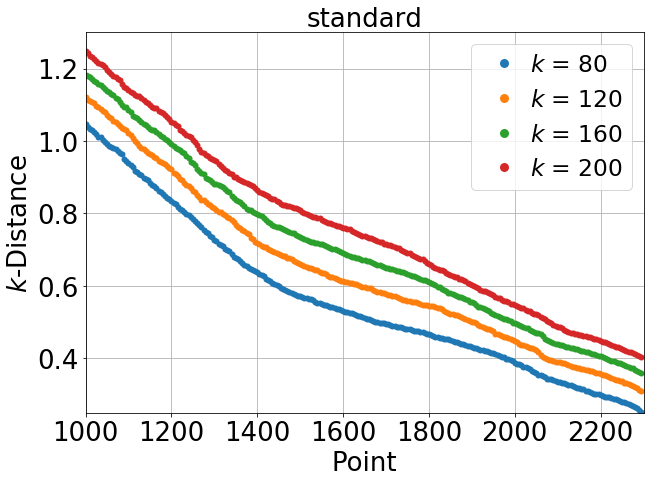

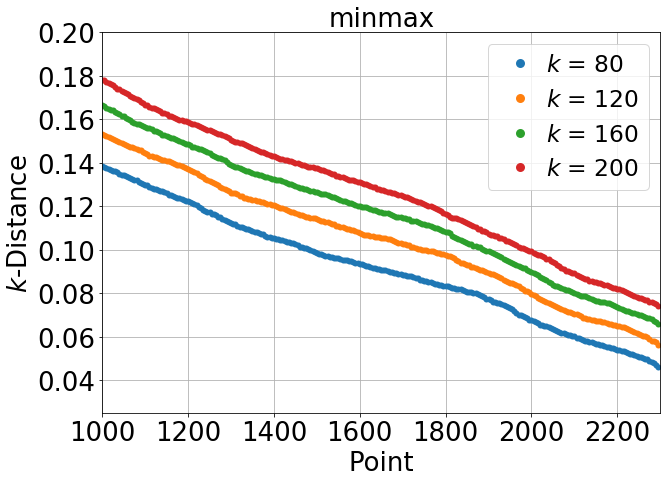

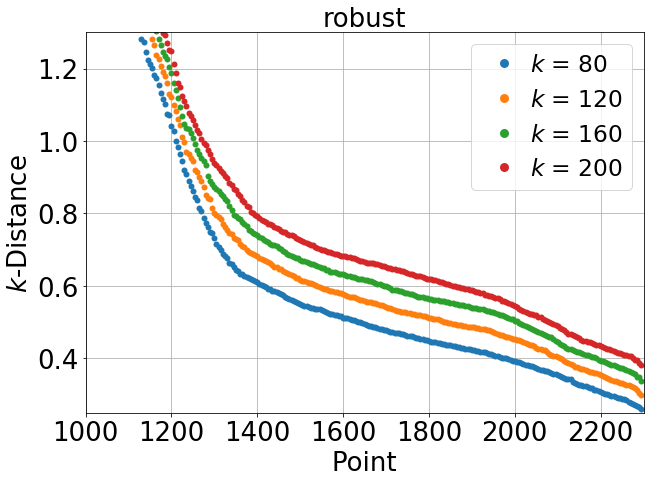

In [4]:
# Plot EPS ======================================
fontsize = 26
for scale in scales:
    
    data_scl = Table.read(path  + 'sample_clusters/cl_scale/scl_' + scale + '.vot', format = 'votable')
    data_x   = Dbscan()
    data_x.load(data=data, data_scl=data_scl.to_pandas())

    fig    = plt.figure(figsize = figsize)
    for mPts in mpts:
        data_x.compute_neighbours(min_points=mPts)
        x = data_x.n_distance['ind'].data[0::5] #rebin every 5 steps to ease PDF plots
        y = data_x.n_distance['dist'].data[0::5] 
        plt.plot(x, y, 'o', label = r'$k$ = ' + np.str(mPts), markeredgecolor = 'none')
        plt.title(scale, fontsize = fontsize)

    set_plot(pdf_name='01_explore_eps_fig0_' + scale + '.pdf', ylim=next(ylims), fontsize = fontsize)